In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("Pune.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,PS,WS50M,RH2M,PRECTOTCORR,T2M
0,2011,4,1,5,94.02,3.85,53.69,0.0,18.44
1,2011,4,1,6,94.09,3.19,52.88,0.0,19.72
2,2011,4,1,7,94.17,3.23,37.56,0.0,23.73
3,2011,4,1,8,94.22,4.45,20.12,0.0,28.10
4,2011,4,1,9,94.22,4.75,14.31,0.0,31.20
...,...,...,...,...,...,...,...,...,...
87667,2021,4,1,0,93.68,2.83,78.88,0.0,20.54
87668,2021,4,1,1,93.63,2.76,79.81,0.0,20.12
87669,2021,4,1,2,93.59,2.83,80.94,0.0,19.65
87670,2021,4,1,3,93.59,2.83,81.75,0.0,19.22


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
PS             0.0
WS50M          0.0
RH2M           0.0
PRECTOTCORR    0.0
T2M            0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'PS', 'WS50M', 'RH2M', 'PRECTOTCORR', 'T2M']


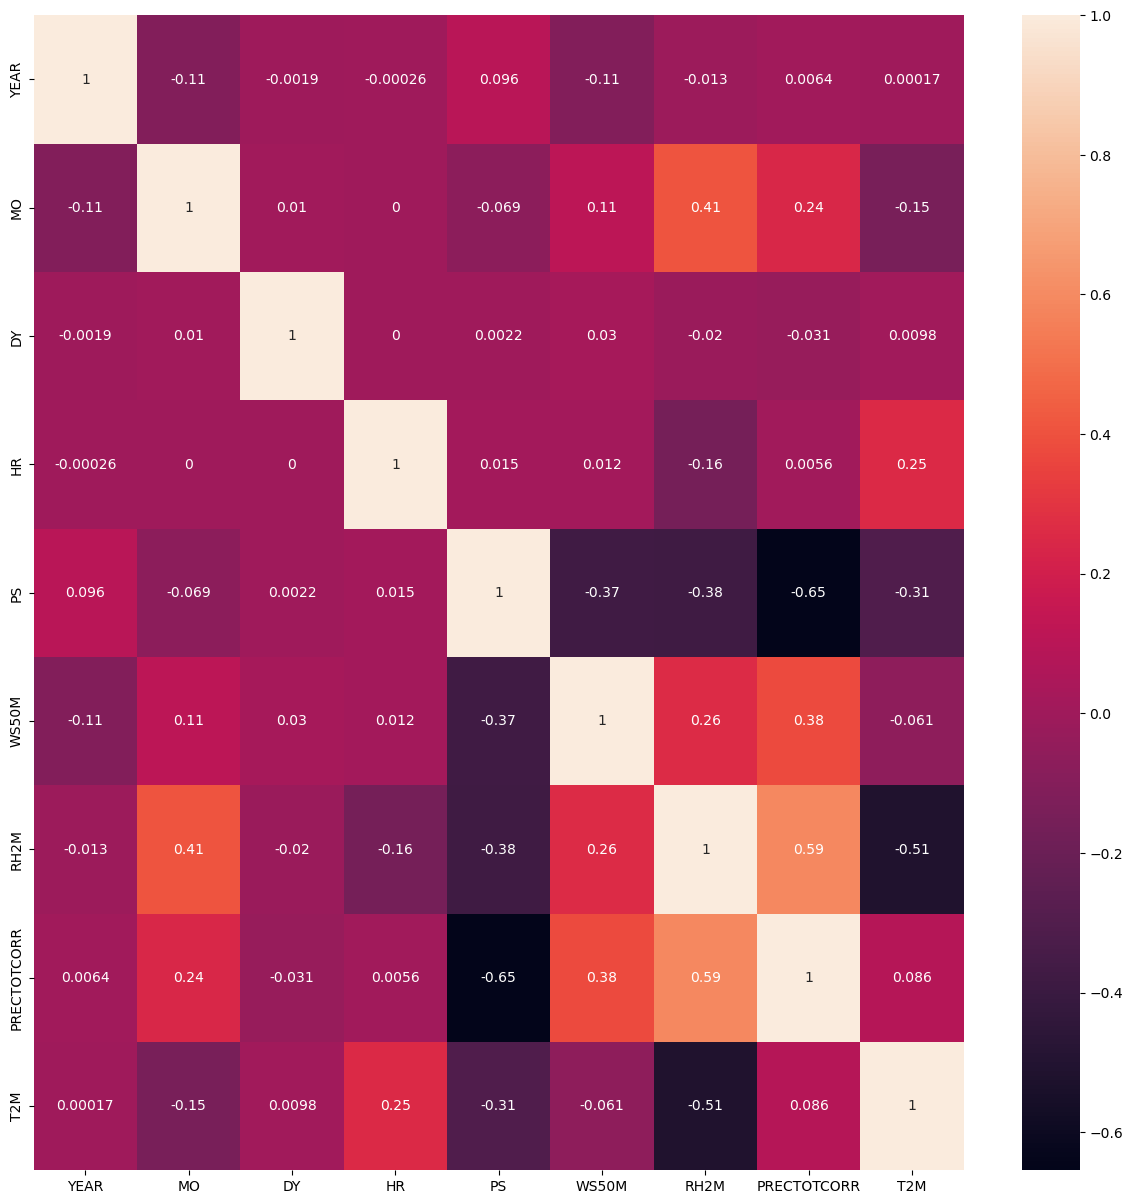

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

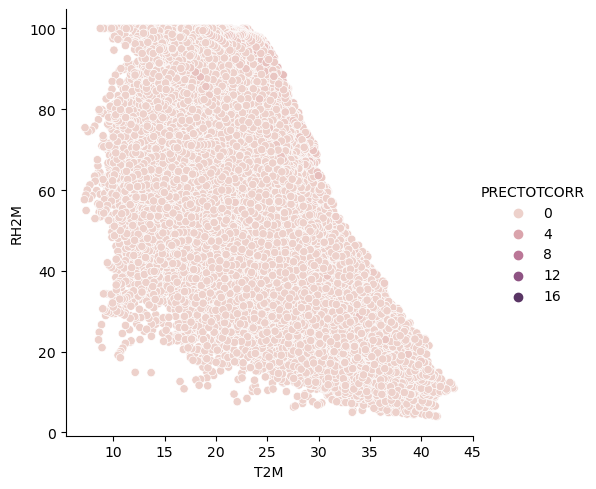

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


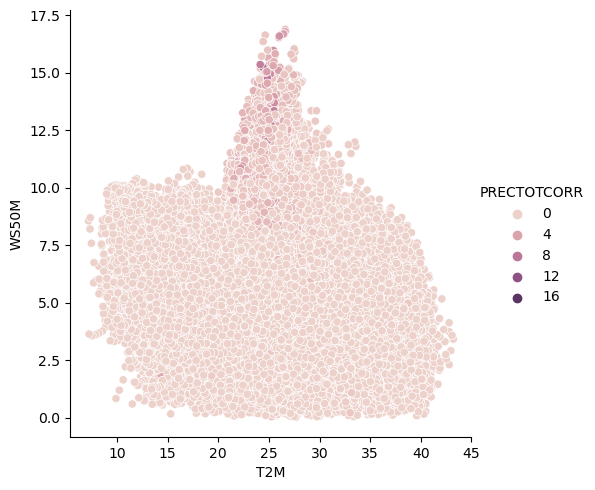

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


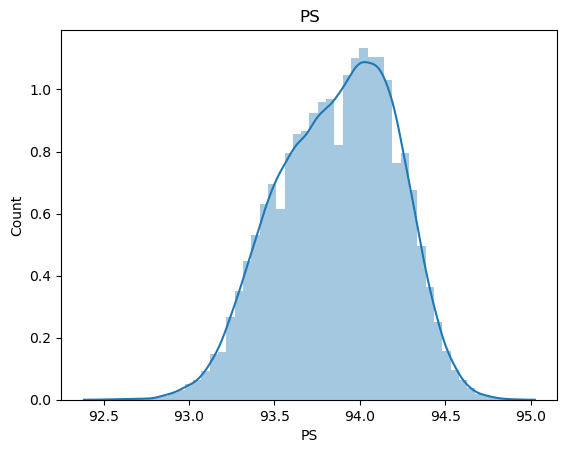

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


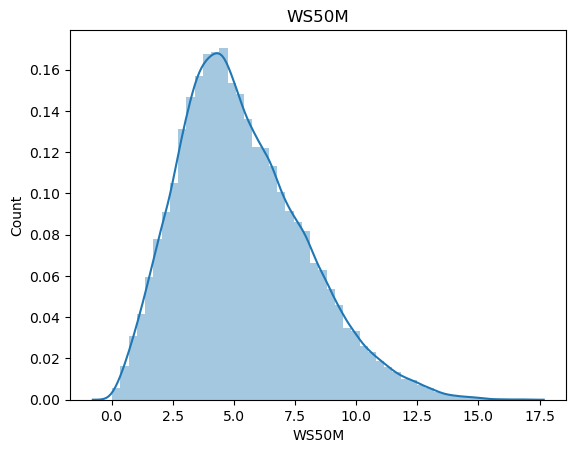

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


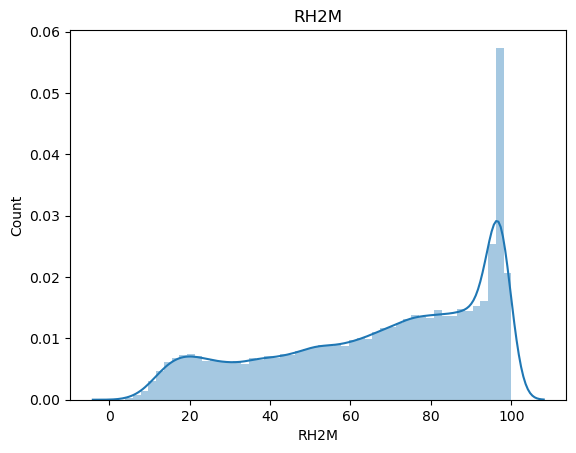

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


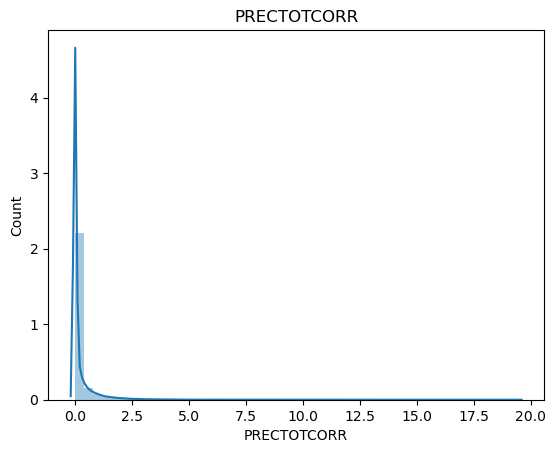

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


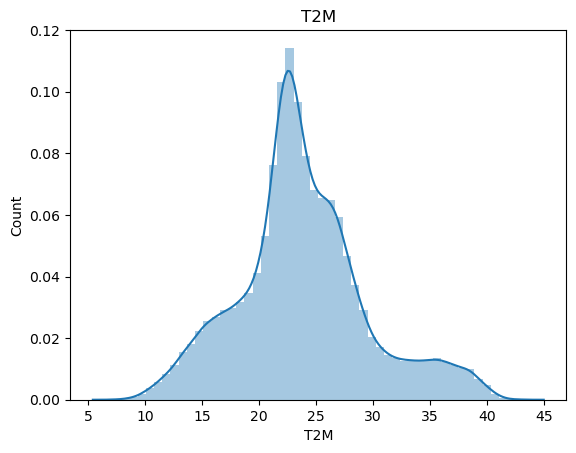

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

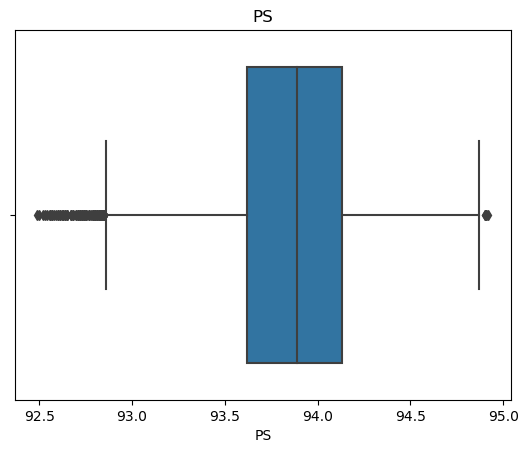

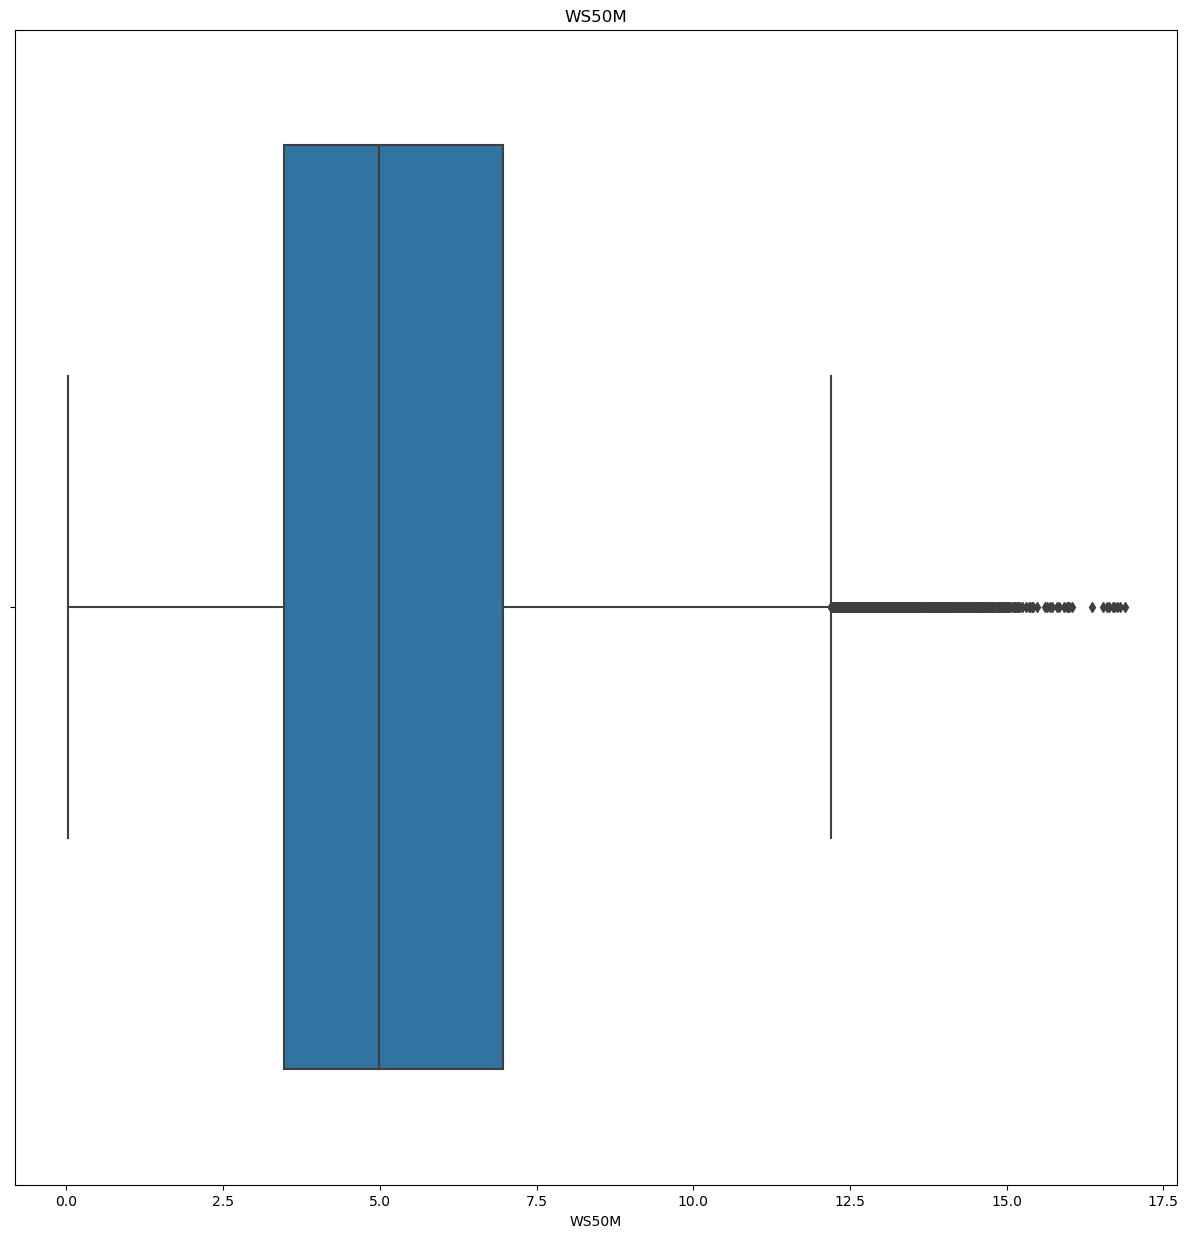

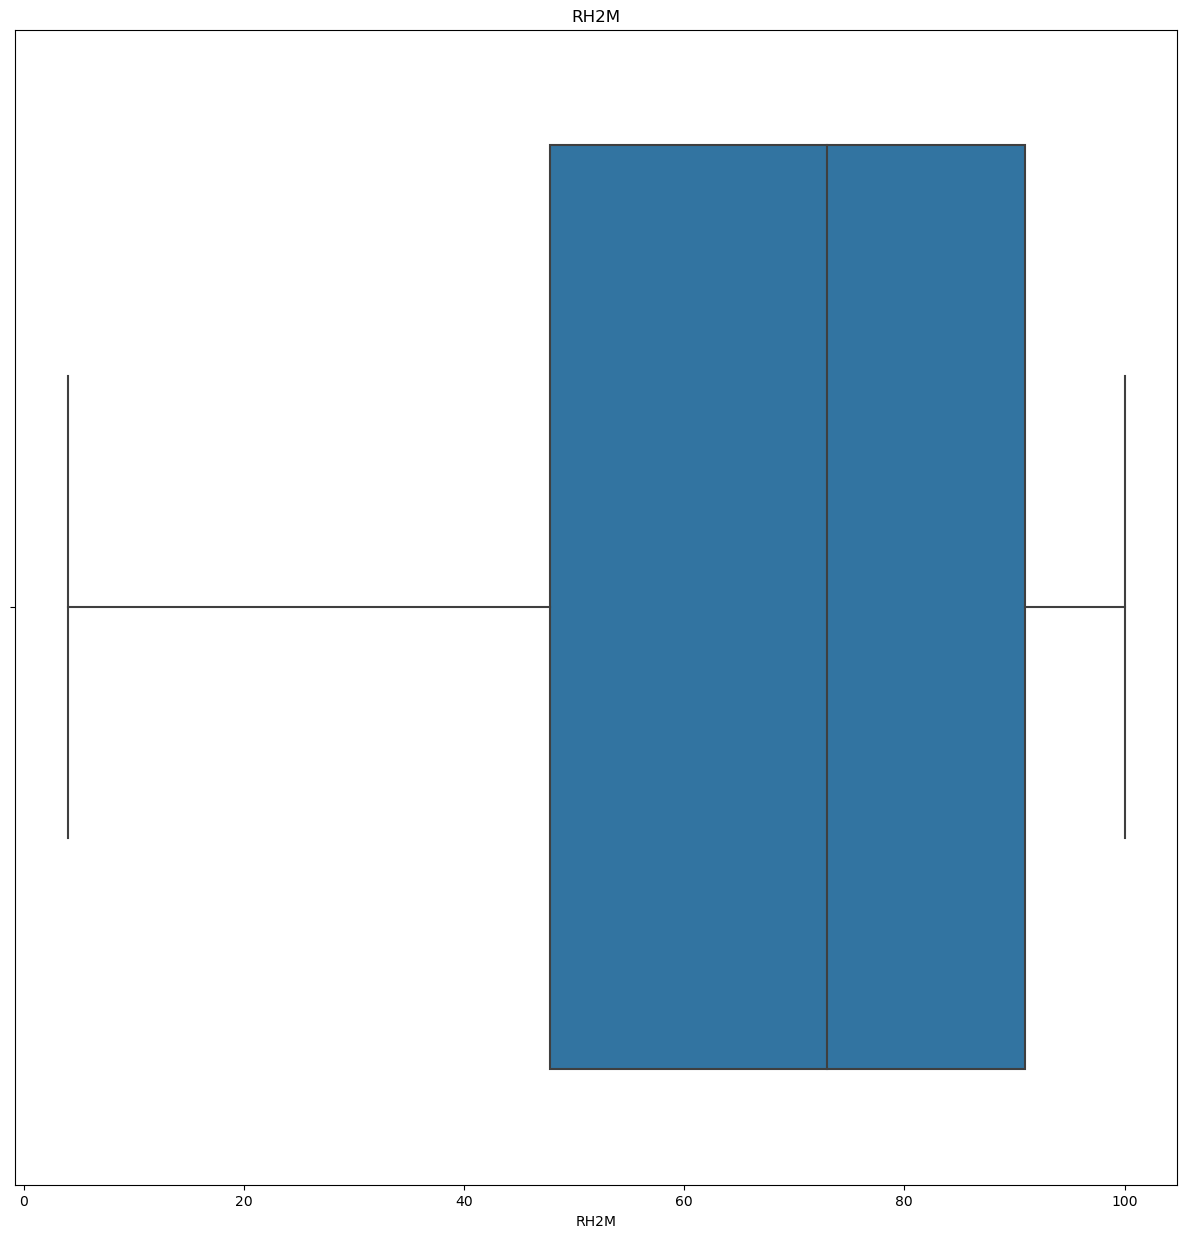

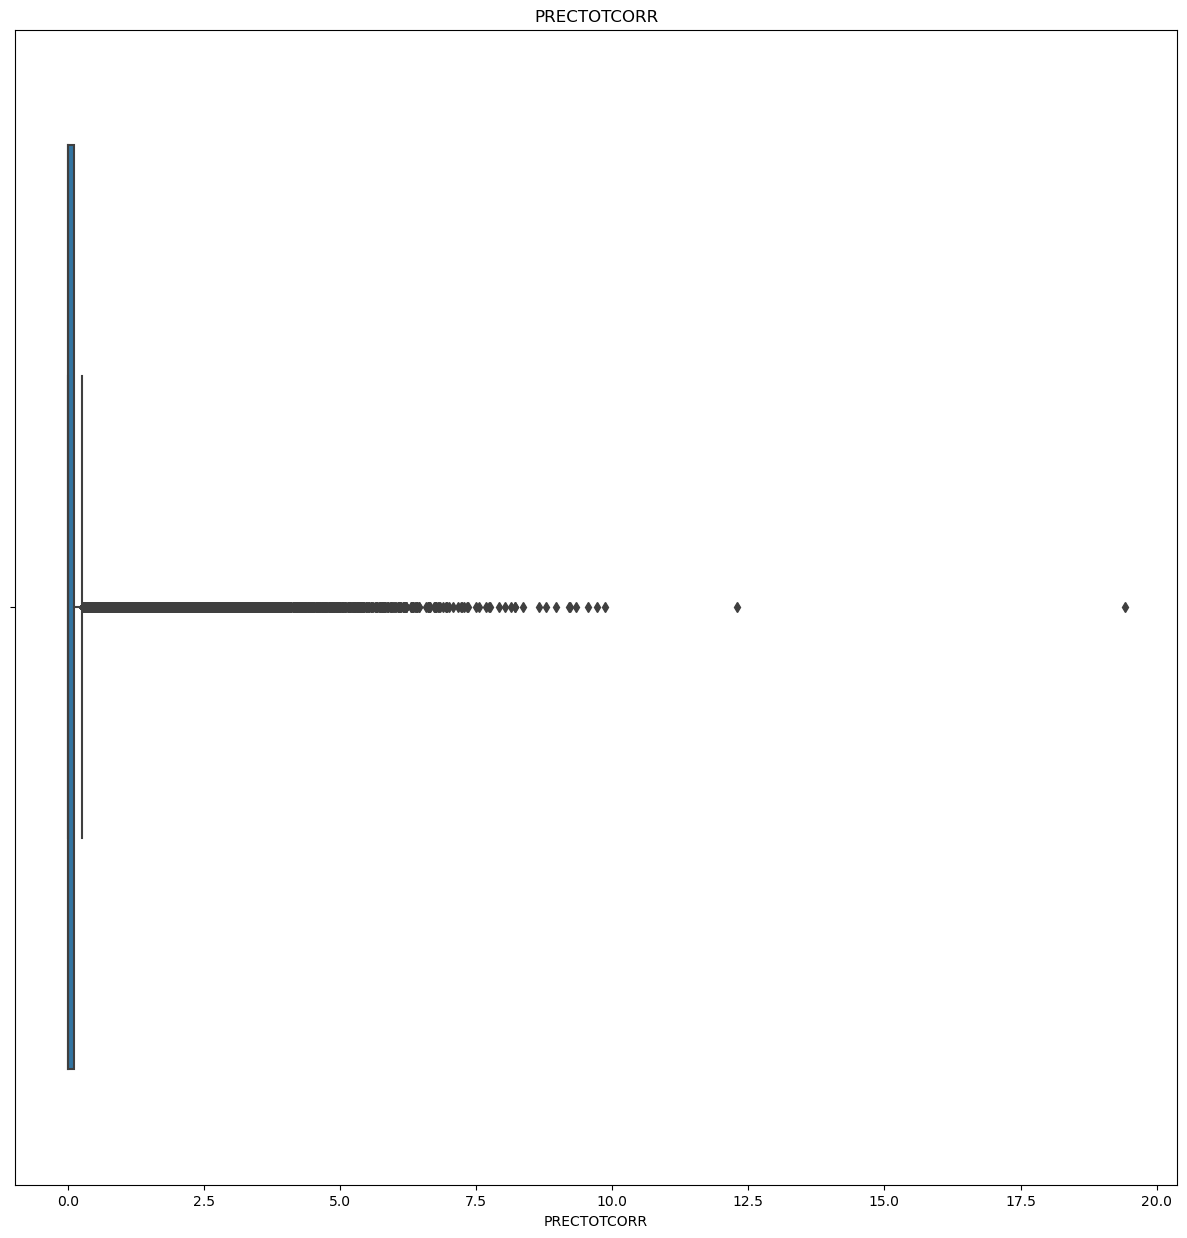

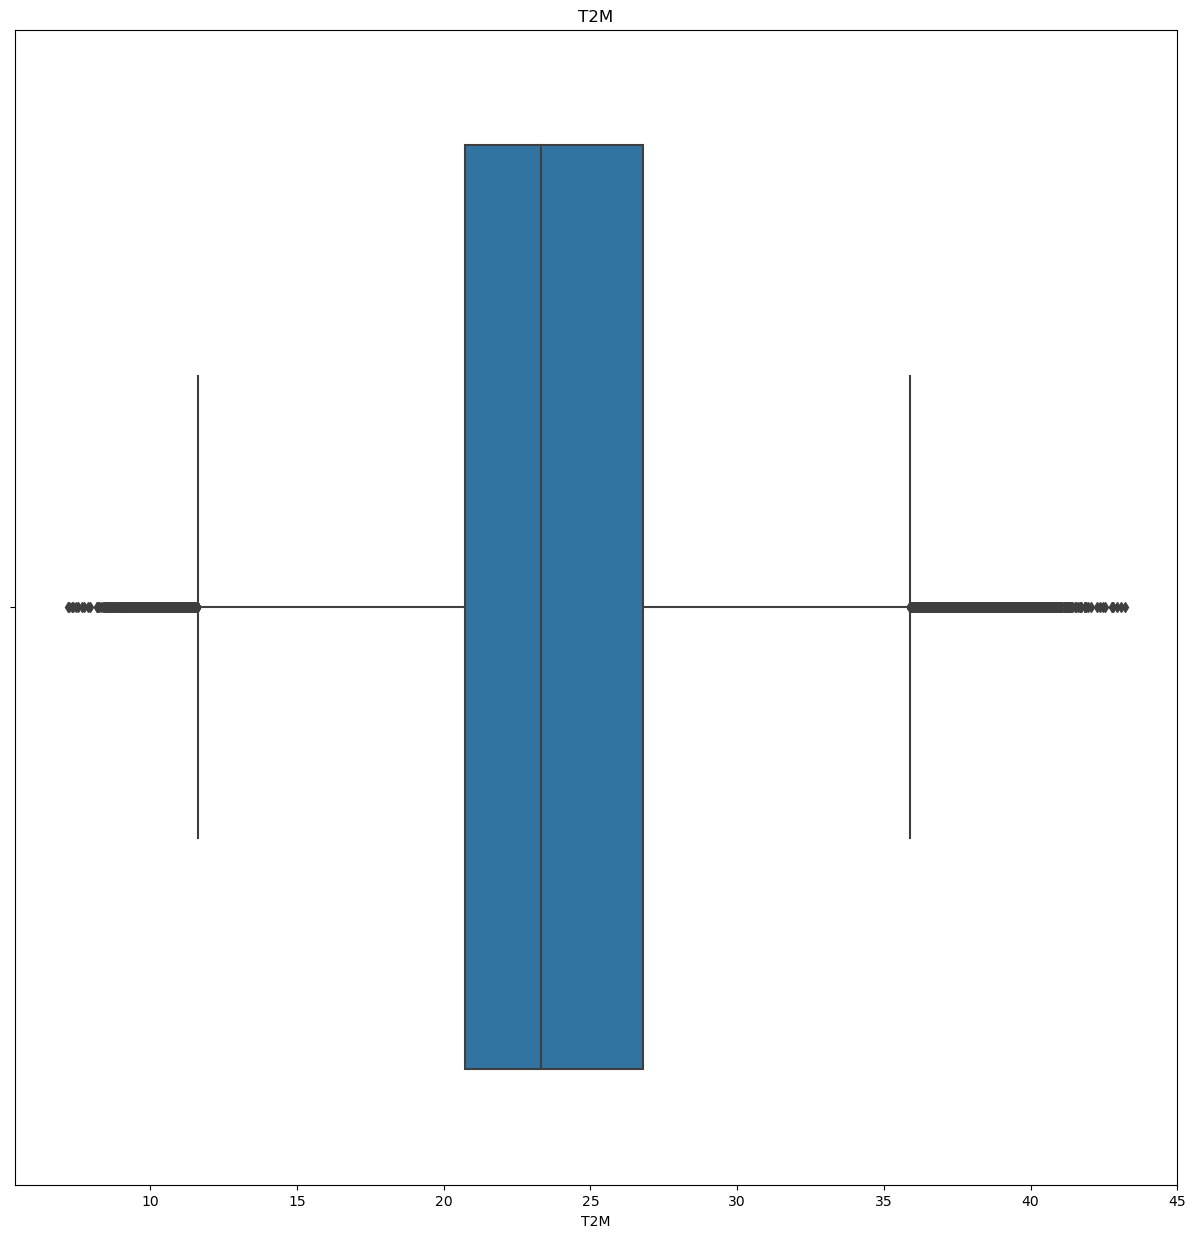

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[18.44 19.72 23.73 ... 40.67 40.34 10.52]
<class 'numpy.ndarray'>
[0.000e+00 1.000e-02 3.000e-02 4.000e-02 5.000e-02 2.000e-02 1.400e-01
 1.300e-01 3.700e-01 5.200e-01 2.900e-01 2.800e-01 3.100e-01 8.800e-01
 8.300e-01 4.000e-01 4.300e-01 3.200e-01 6.000e-01 1.430e+00 1.890e+00
 2.090e+00 1.840e+00 1.100e+00 5.800e-01 1.600e-01 1.000e-01 9.000e-02
 7.400e-01 5.900e-01 3.000e-01 3.800e-01 3.300e-01 1.900e-01 1.700e-01
 6.000e-02 7.000e-02 1.360e+00 1.030e+00 1.010e+00 1.080e+00 1.300e+00
 1.460e+00 1.760e+00 1.490e+00 8.900e-01 4.600e-01 3.600e-01 5.300e-01
 6.200e-01 9.000e-01 9.800e-01 1.130e+00 1.270e+00 1.280e+00 1.400e+00
 1.510e+00 1.570e+00 1.560e+00 1.260e+00 1.420e+00 1.340e+00 1.310e+00
 1.710e+00 2.150e+00 2.490e+00 3.410e+00 4.050e+00 3.280e+00 2.590e+00
 2.760e+00 3.080e+00 2.710e+00 2.690e+00 2.650e+00 2.360e+00 1.960e+00
 1.720e+00 2.080e+00 2.400e+00 2.830e+00 3.940e+00 5.150e+00 6.340e+00
 3.630e+00 4.080e+00 4.160e+00 4.840e+00 5.120e+00 4.970e+00 4.620e+00
 2.770e+00 

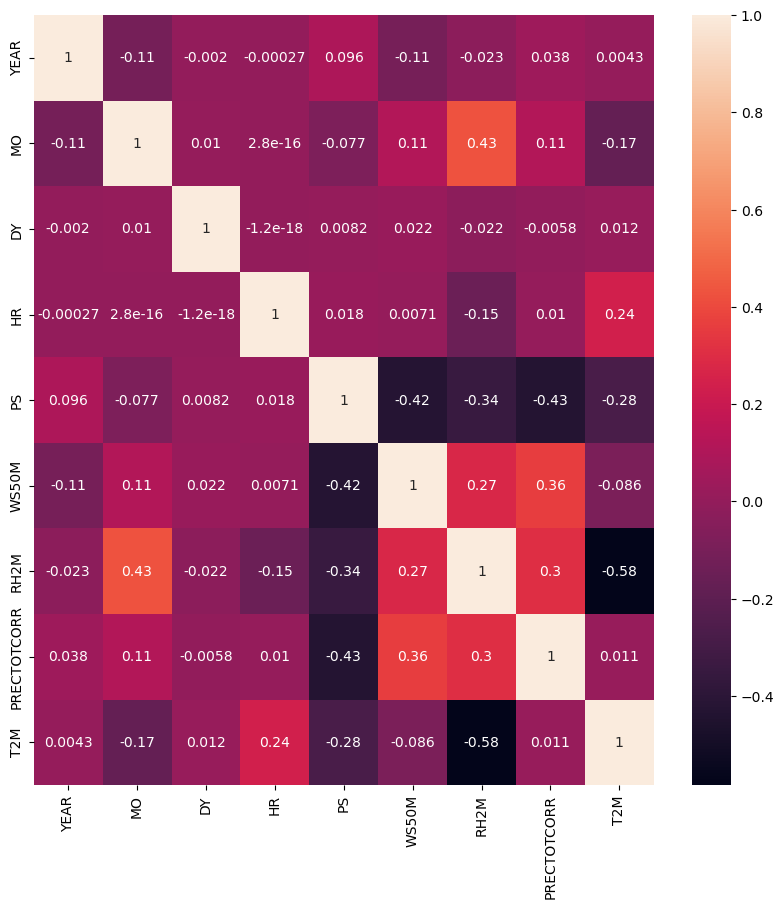

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


PS


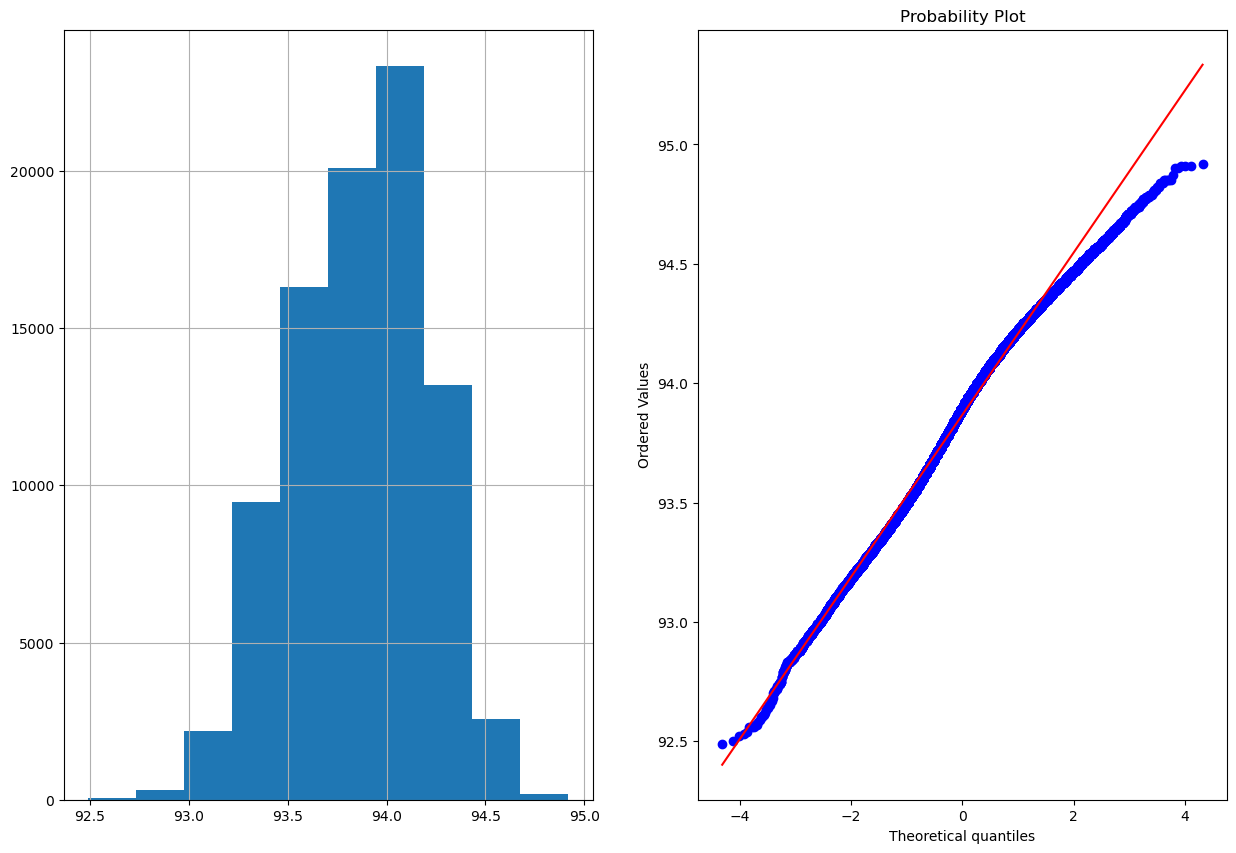

WS50M


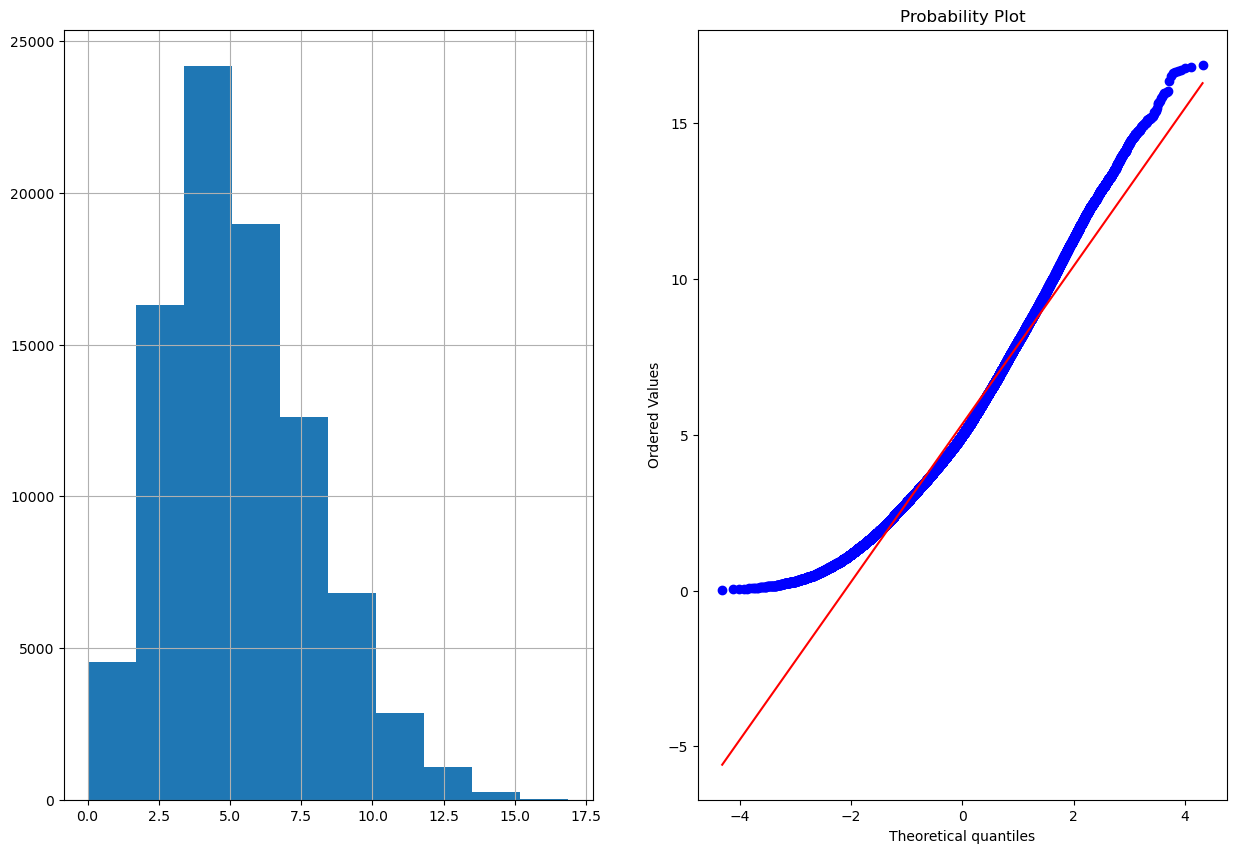

RH2M


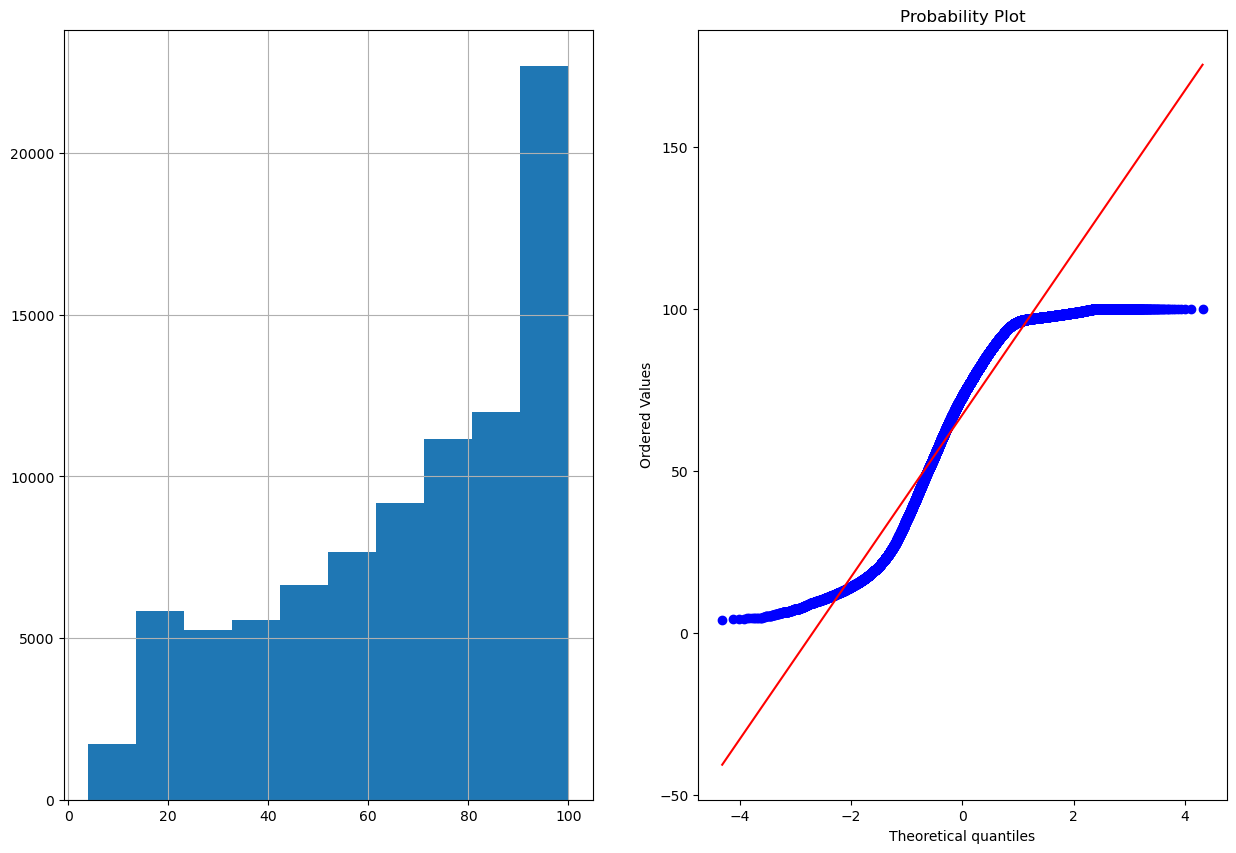

PRECTOTCORR


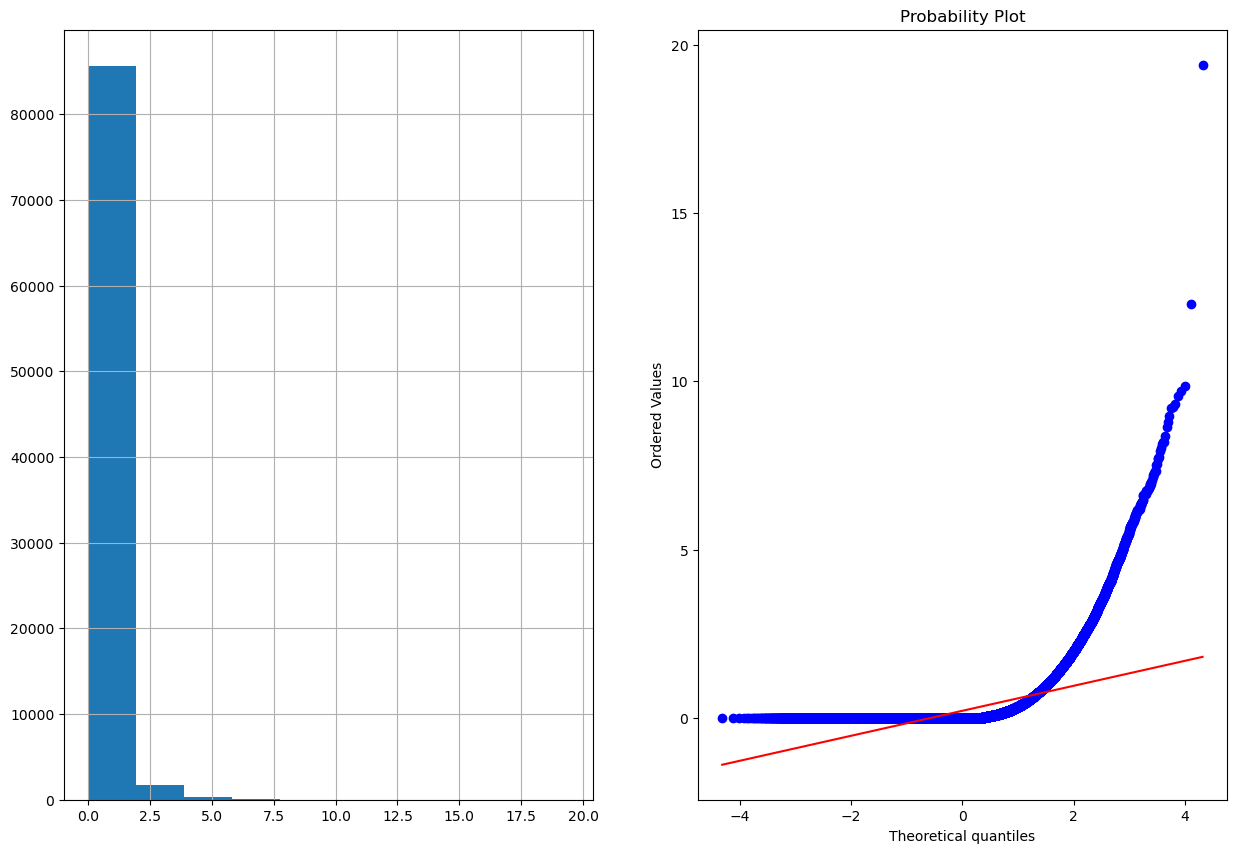

T2M


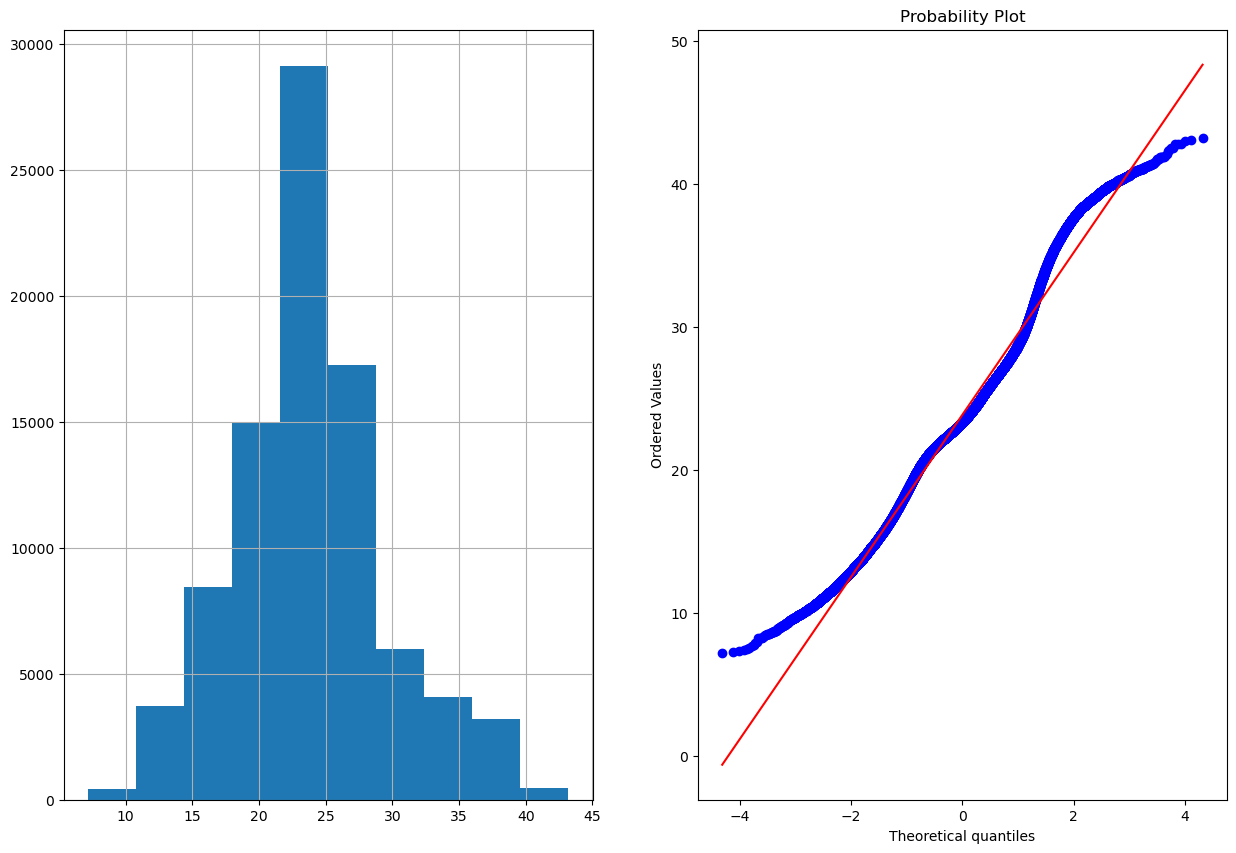

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([0.000e+00, 1.000e-02, 3.000e-02, 4.000e-02, 5.000e-02, 2.000e-02,
       1.400e-01, 1.300e-01, 3.700e-01, 5.200e-01, 2.900e-01, 2.800e-01,
       3.100e-01, 8.800e-01, 8.300e-01, 4.000e-01, 4.300e-01, 3.200e-01,
       6.000e-01, 1.430e+00, 1.890e+00, 2.090e+00, 1.840e+00, 1.100e+00,
       5.800e-01, 1.600e-01, 1.000e-01, 9.000e-02, 7.400e-01, 5.900e-01,
       3.000e-01, 3.800e-01, 3.300e-01, 1.900e-01, 1.700e-01, 6.000e-02,
       7.000e-02, 1.360e+00, 1.030e+00, 1.010e+00, 1.080e+00, 1.300e+00,
       1.460e+00, 1.760e+00, 1.490e+00, 8.900e-01, 4.600e-01, 3.600e-01,
       5.300e-01, 6.200e-01, 9.000e-01, 9.800e-01, 1.130e+00, 1.270e+00,
       1.280e+00, 1.400e+00, 1.510e+00, 1.570e+00, 1.560e+00, 1.260e+00,
       1.420e+00, 1.340e+00, 1.310e+00, 1.710e+00, 2.150e+00, 2.490e+00,
       3.410e+00, 4.050e+00, 3.280e+00, 2.590e+00, 2.760e+00, 3.080e+00,
       2.710e+00, 2.690e+00, 2.650e+00, 2.360e+00, 1.960e+00, 1.720e+00,
       2.080e+00, 2.400e+00, 2.830e+00, 3.940e+00, 

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([1., 0.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,18.44,1.0
1,19.72,1.0
2,23.73,1.0
3,28.10,1.0
4,31.20,1.0
...,...,...
87667,20.54,1.0
87668,20.12,1.0
87669,19.65,1.0
87670,19.22,1.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,18.44,1.0,5
1,19.72,1.0,6
2,23.73,1.0,7
3,28.10,1.0,8
4,31.20,1.0,9
...,...,...,...
87667,20.54,1.0,0
87668,20.12,1.0,1
87669,19.65,1.0,2
87670,19.22,1.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,18.44,1.0,5,1
1,19.72,1.0,6,1
2,23.73,1.0,7,1
3,28.10,1.0,8,1
4,31.20,1.0,9,1
...,...,...,...,...
87667,20.54,1.0,0,1
87668,20.12,1.0,1,1
87669,19.65,1.0,2,1
87670,19.22,1.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,18.44,1.0,5,1,4
1,19.72,1.0,6,1,4
2,23.73,1.0,7,1,4
3,28.10,1.0,8,1,4
4,31.20,1.0,9,1,4
...,...,...,...,...,...
87667,20.54,1.0,0,1,4
87668,20.12,1.0,1,1,4
87669,19.65,1.0,2,1,4
87670,19.22,1.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,18.44,1.0,5,1,4,2011
1,19.72,1.0,6,1,4,2011
2,23.73,1.0,7,1,4,2011
3,28.10,1.0,8,1,4,2011
4,31.20,1.0,9,1,4,2011
...,...,...,...,...,...,...
87667,20.54,1.0,0,1,4,2021
87668,20.12,1.0,1,1,4,2021
87669,19.65,1.0,2,1,4,2021
87670,19.22,1.0,3,1,4,2021


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,18.44,1.0,5,1,4,2011
1,19.72,1.0,6,1,4,2011
2,23.73,1.0,7,1,4,2011
3,28.10,1.0,8,1,4,2011
4,31.20,1.0,9,1,4,2011
...,...,...,...,...,...,...
87667,20.54,1.0,0,1,4,2021
87668,20.12,1.0,1,1,4,2021
87669,19.65,1.0,2,1,4,2021
87670,19.22,1.0,3,1,4,2021


In [33]:
d12['PRECTOTCORR'].unique()

array([1., 0.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,18.44,1.0,5,1,4,2011,53.69
1,19.72,1.0,6,1,4,2011,52.88
2,23.73,1.0,7,1,4,2011,37.56
3,28.10,1.0,8,1,4,2011,20.12
4,31.20,1.0,9,1,4,2011,14.31
...,...,...,...,...,...,...,...
87667,20.54,1.0,0,1,4,2021,78.88
87668,20.12,1.0,1,1,4,2021,79.81
87669,19.65,1.0,2,1,4,2021,80.94
87670,19.22,1.0,3,1,4,2021,81.75


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,18.44,1.0,5,1,4,2011,53.69,3.85
1,19.72,1.0,6,1,4,2011,52.88,3.19
2,23.73,1.0,7,1,4,2011,37.56,3.23
3,28.10,1.0,8,1,4,2011,20.12,4.45
4,31.20,1.0,9,1,4,2011,14.31,4.75
...,...,...,...,...,...,...,...,...
87667,20.54,1.0,0,1,4,2021,78.88,2.83
87668,20.12,1.0,1,1,4,2021,79.81,2.76
87669,19.65,1.0,2,1,4,2021,80.94,2.83
87670,19.22,1.0,3,1,4,2021,81.75,2.83


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,18.44,1.0,5,1,4,2011,53.69,3.85,3.85
1,19.72,1.0,6,1,4,2011,52.88,3.19,3.19
2,23.73,1.0,7,1,4,2011,37.56,3.23,3.23
3,28.10,1.0,8,1,4,2011,20.12,4.45,4.45
4,31.20,1.0,9,1,4,2011,14.31,4.75,4.75
...,...,...,...,...,...,...,...,...,...
87667,20.54,1.0,0,1,4,2021,78.88,2.83,2.83
87668,20.12,1.0,1,1,4,2021,79.81,2.76,2.76
87669,19.65,1.0,2,1,4,2021,80.94,2.83,2.83
87670,19.22,1.0,3,1,4,2021,81.75,2.83,2.83


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

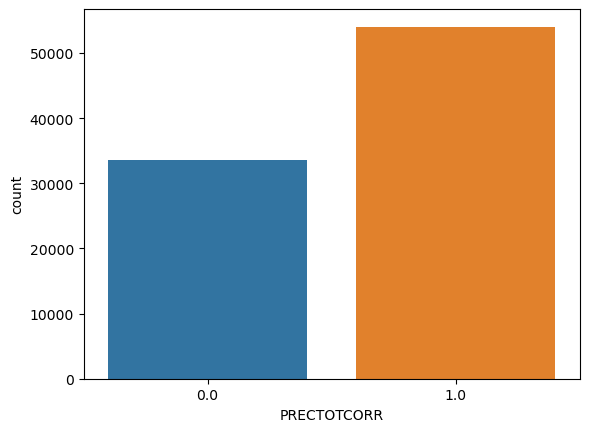

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("Pune-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,18.44,1.0,5,1,4,2011,53.69,3.85,3.85
1,19.72,1.0,6,1,4,2011,52.88,3.19,3.19
2,23.73,1.0,7,1,4,2011,37.56,3.23,3.23
3,28.10,1.0,8,1,4,2011,20.12,4.45,4.45
4,31.20,1.0,9,1,4,2011,14.31,4.75,4.75
...,...,...,...,...,...,...,...,...,...
87667,20.54,1.0,0,1,4,2021,78.88,2.83,2.83
87668,20.12,1.0,1,1,4,2021,79.81,2.76,2.76
87669,19.65,1.0,2,1,4,2021,80.94,2.83,2.83
87670,19.22,1.0,3,1,4,2021,81.75,2.83,2.83
